# BoomBike Sales Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


#Importing train_test_split 
from sklearn.model_selection import train_test_split

# Importing MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Importing statsmodel
import statsmodels.api as sm 

# Importing VIF for calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing r2_score for calculation
from sklearn.metrics import r2_score 

## Step 1. Reading and Understanding Data 

In [2]:
# Read the given CSV file, and view records
bikes_data=pd.read_csv('day.csv')

In [3]:
bikes_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bikes_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# checking the null values in the data frame
bikes_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Droping the unnecessary columns from the analysis.
1. instant - this is a column for indexing purpose
2. dteday- It's a date column and we can't consider it as either a numerical or categorical data
3. casual and registered - The count of type of users.Our analysis the demand it might be casual or Registered.

In [7]:
bikes_data.drop(['dteday','instant','casual','registered'],axis=1,inplace=True)

In [8]:
bikes_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [9]:
bikes_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## Step 2. Data Visualisation

### Visualising numerical Data

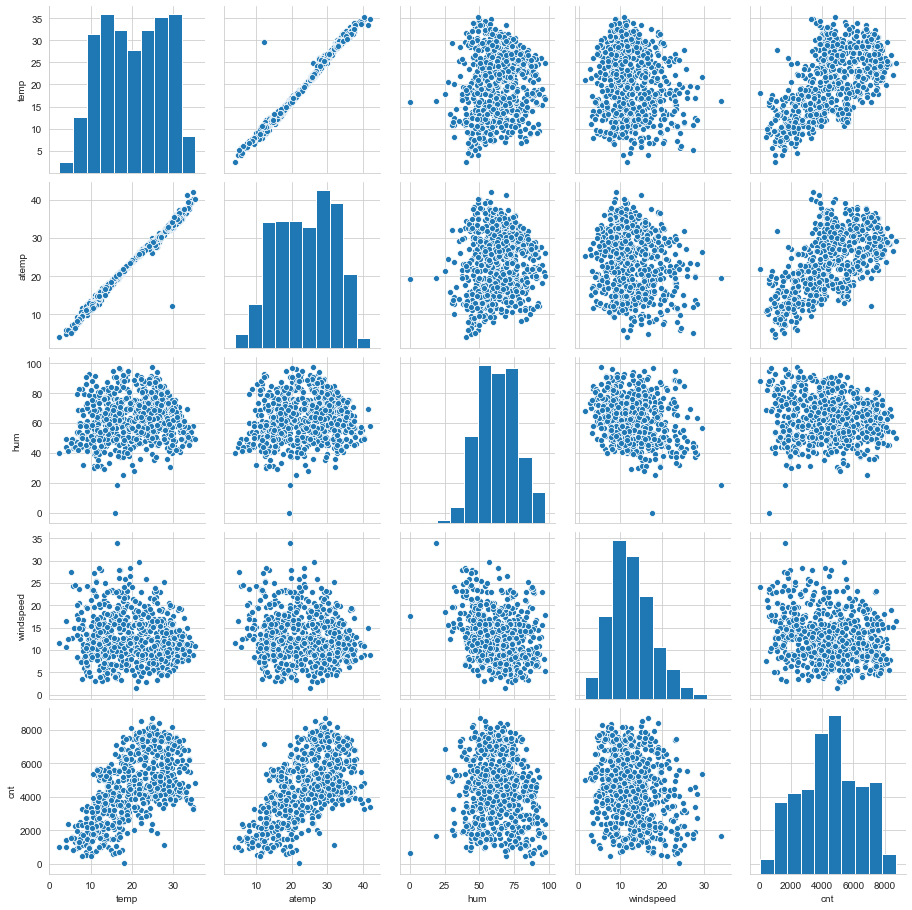

In [11]:
sns.set_style("whitegrid")
sns.pairplot(bikes_data[['temp','atemp','hum','windspeed','cnt']])
plt.show()

#### Obseravtion:
1. The number of rentals per day seem to be increasing with temperature and adjusted temperature,adjusted temperature and temperature have similar trends.
2. temp vs cnt has two outliers between 15 and 30.
3. atemp vs cnt has two outliers between 20 and 35.
4. hum vs cnt has two outliers below 20.
5. windspeed vs cnt has one outlier above 30.

### Visualising categorical Data

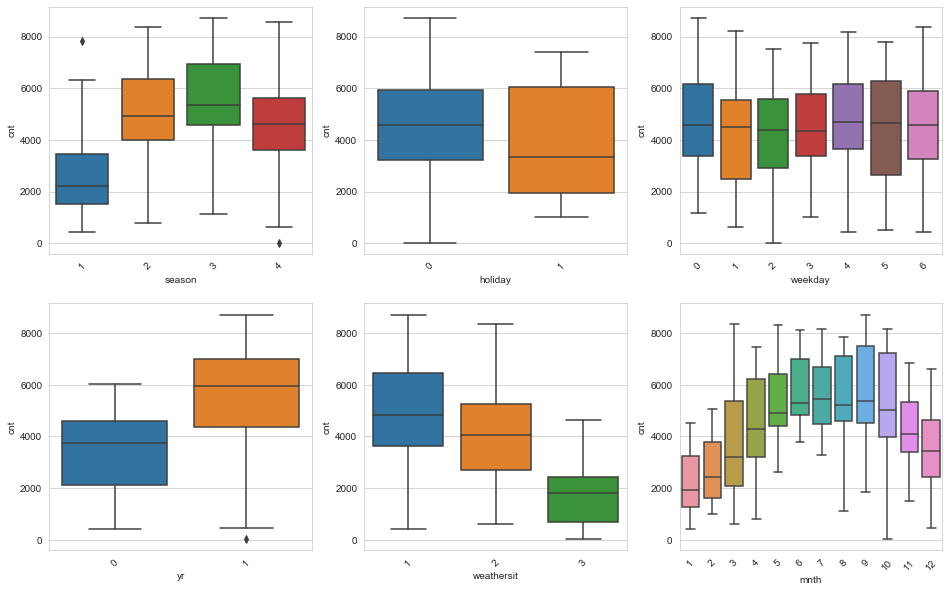

In [12]:
def categorical_analysis_box(cat_var,tar_var,data):
    plt.figure(figsize=(16, 10))
    for i in range(0,len(cat_var)):
        sns.set_style("whitegrid")
        plt.subplot(2,3,i+1)
        sns.boxplot(x = cat_var[i], y = tar_var, data = data)
        plt.xticks(rotation=45)
    plt.show()

categorical_analysis_box(['season','holiday','weekday','yr','weathersit','mnth'],'cnt',bikes_data)

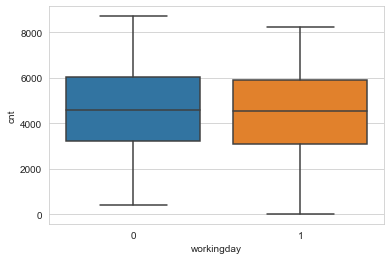

In [13]:
sns.boxplot(x = 'workingday', y ='cnt', data = bikes_data)
plt.show()

In [14]:
bikes_data['workingday'].value_counts(normalize=True) * 100

1    69.041096
0    30.958904
Name: workingday, dtype: float64

#### Observations:
 1. The rental count in falls season is more in compare to the other seasons.
 2. Rental count is more in workingdays the median lies in between 4000-6000 .
 3. In 2019,  the rental count is more than 2018 the median of 2019 is 6000.
 4. Rental count is more in Clear_Few_Clouds weathersit whose median lies between 4000-6000.
 5. Rental count is high in Sept month

### Visualising Correlation of Dataset

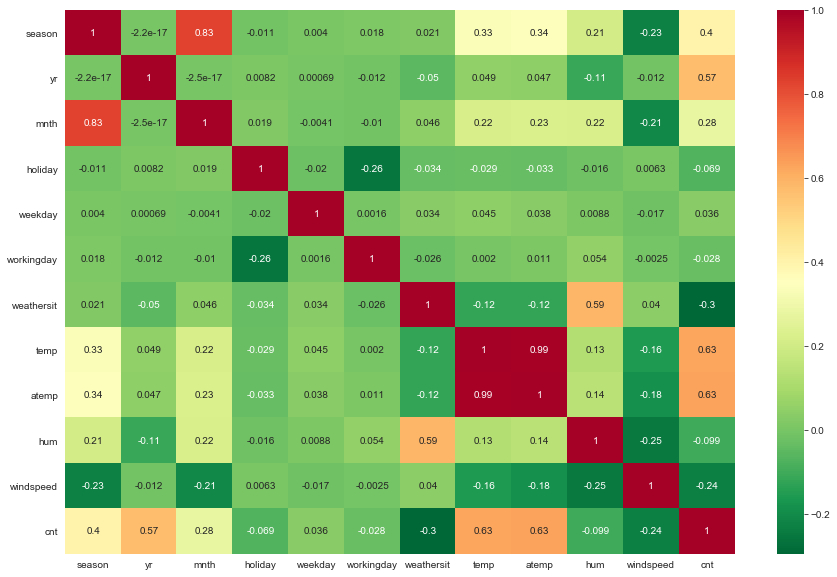

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(bikes_data.corr(), annot=True, cmap="RdYlGn_r")
plt.show()

#### Observations:
1. atemp and temp columns are highly correlated to count column.

## Step 3. Data Preparation

### Categorical Columns Adjustment
1. season- This column contains numerical value as season (1:spring, 2:summer, 3:fall, 4:winter) which need to be in category of season names
2. mnth- This column contains numerical value for month which need to be properly noted.
3. weekday= day of the week 
4. weathersit columns contains numerical values which represent the following meaning
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [16]:
bikes_data['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bikes_data['mnth'] = bikes_data['mnth'].map({1:'Jan',2:'Feb', 3:'Mar', 4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
bikes_data['weekday'].replace({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'},inplace=True)
bikes_data['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)

In [17]:
bikes_data['season'].value_counts(normalize=True) * 100

fall      25.753425
summer    25.205479
spring    24.657534
winter    24.383562
Name: season, dtype: float64

In [18]:
bikes_data['mnth'].value_counts(normalize=True) * 100

Jan     8.493151
Oct     8.493151
May     8.493151
Mar     8.493151
Dec     8.493151
Aug     8.493151
Jul     8.493151
Jun     8.219178
Sept    8.219178
Nov     8.219178
Apr     8.219178
Feb     7.671233
Name: mnth, dtype: float64

In [19]:
bikes_data['weathersit'].value_counts(normalize=True) * 100

Clear_Few Clouds                      63.424658
Mist_cloudy                           33.698630
Light rain_Light snow_Thunderstorm     2.876712
Name: weathersit, dtype: float64

In [20]:
bikes_data['holiday'].value_counts(normalize=True) * 100

0    97.123288
1     2.876712
Name: holiday, dtype: float64

In [21]:
bikes_data['weekday'].value_counts(normalize=True) * 100

Tuesday      14.383562
Monday       14.383562
Sunday       14.246575
Friday       14.246575
Wednesday    14.246575
Saturday     14.246575
Thursday     14.246575
Name: weekday, dtype: float64

### Dummy Variable

In [22]:
# Defining the map function
def dummies(cols,data):
    for x in cols:
        t = pd.get_dummies(data[x], drop_first = True)
        data = pd.concat([data, t], axis = 1)
        data.drop([x], axis = 1, inplace = True)
    return data
# Applying the function to the bike_data
bikes_data=dummies(['season','mnth','weekday','weathersit','workingday'],bikes_data)


In [23]:
bikes_data.head()

,yr,holiday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy,1
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,1,0,0,0,0,0,0,1,1
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,1,0,0,1,1
2,0,0,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [24]:
bikes_data.shape

(730, 30)

## Step 4: Splitting the Data into Training and Testing Sets

In [25]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bikes_data, train_size = 0.7, random_state = 100)

In [26]:
bike_train.shape

(510, 30)

In [27]:
bike_test.shape

(220, 30)

### Rescaling the Features

In [28]:
#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric variables
cols=['temp','atemp','hum','windspeed','cnt']

#Fit on data
bike_train[cols] = scaler.fit_transform(bike_train[cols])


In [29]:
bike_train.describe()
# All the numeric variables ('temp','atemp','hum','windspeed','cnt') are now mapped between 0 and 1

,yr,holiday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy,1
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.711765
std,0.500429,0.157763,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.453386
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Visualising correlation of data

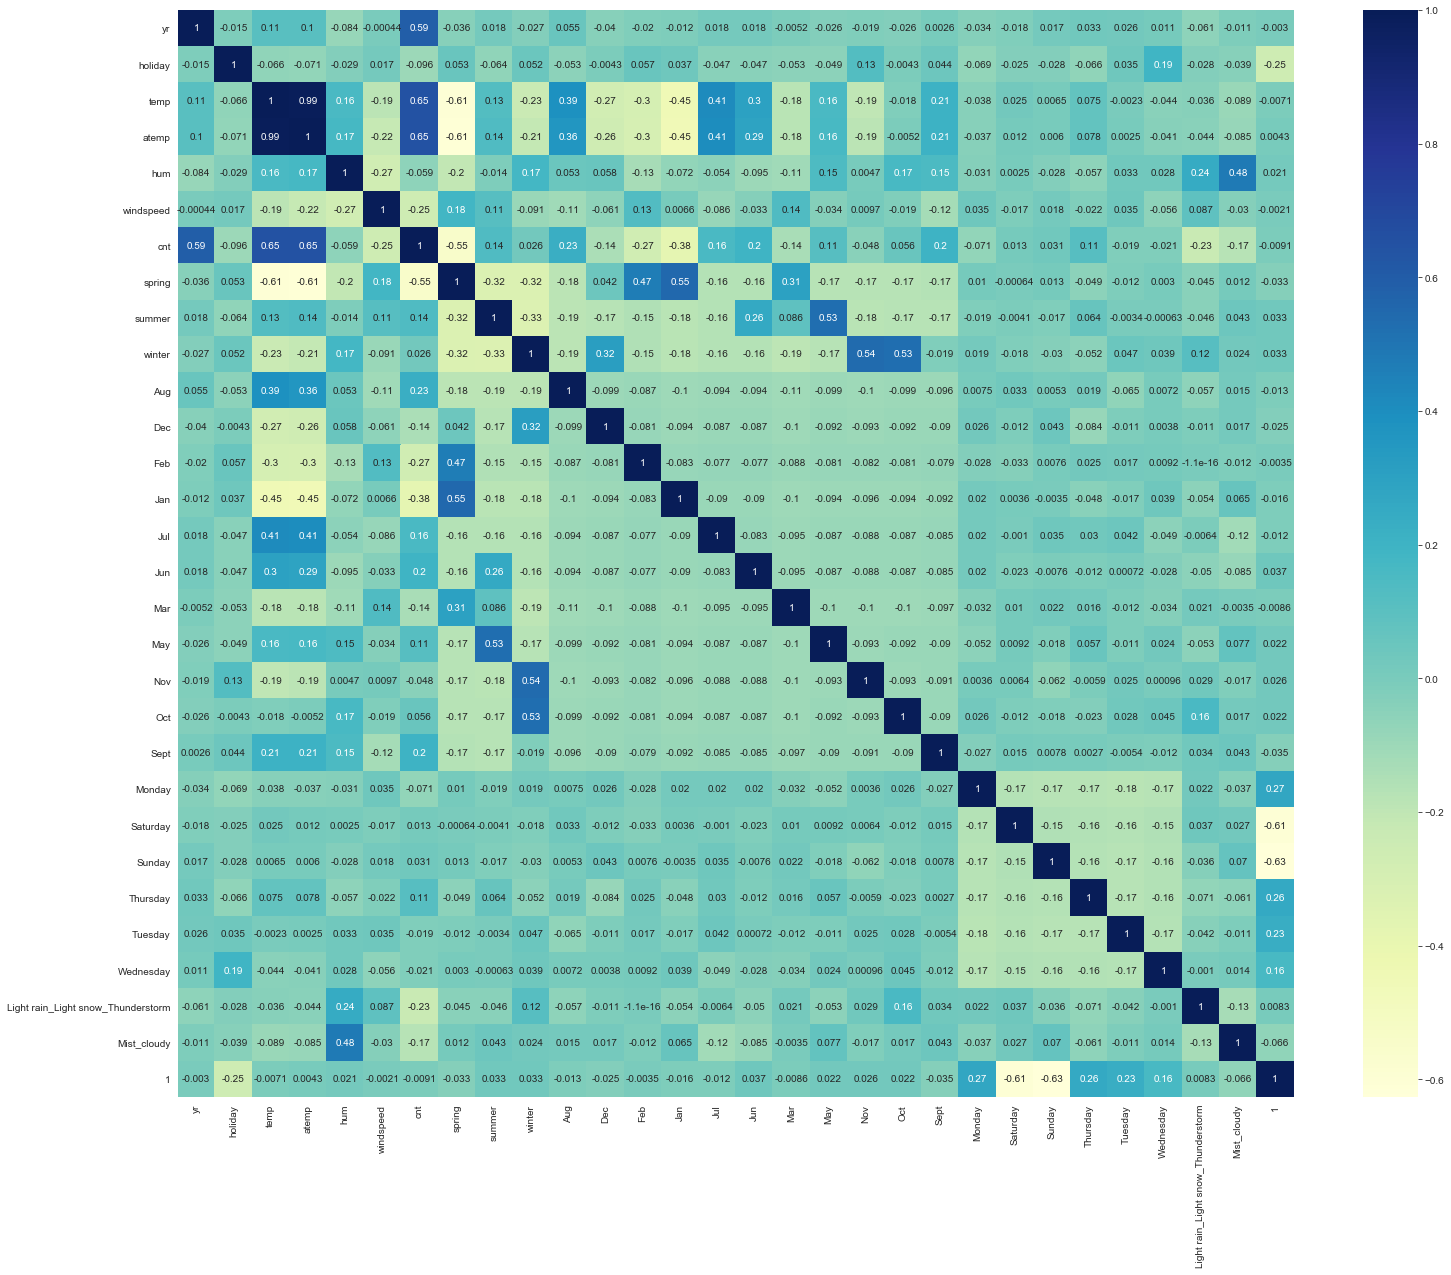

In [30]:
plt.figure(figsize=(25,20))
sns.heatmap(bike_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

### Visualising correlation with respect to the target column i.e. cnt 

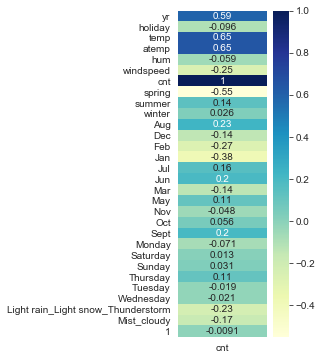

In [31]:
plt.figure(figsize=(2,6))
sns.heatmap(bike_train.corr().loc[:,['cnt']],annot=True, cmap="YlGnBu")
plt.show()

#### Observations:
 Following columns have good correlation with count column.
    1. yr
    2. temp
    3. atemp
    4. season: summer
    5. mnth:  Aug,Jul,Jun,May,Oct,Sept
    6. Weeks: Thursday

### Dividing into X and Y sets for the model building

In [32]:
y_train = bike_train.pop('cnt')
X_train = bike_train

## Step 5: Building a linear model

In [33]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [34]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 12),
 ('Mar', False, 15),
 ('May', False, 9),
 ('Nov', True, 1),
 ('Oct', False, 13),
 ('Sept', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 5),
 ('Sunday', False, 6),
 ('Thursday', False, 14),
 ('Tuesday', False, 7),
 ('Wednesday', False, 11),
 ('Light rain_Light snow_Thunderstorm', True, 1),
 ('Mist_cloudy', True, 1),
 (1, False, 4)]

In [35]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sept',
       'Light rain_Light snow_Thunderstorm', 'Mist_cloudy'],
      dtype='object')

In [36]:
X_train.columns[~rfe.support_]

Index([    'atemp',       'Aug',       'Feb',       'Jun',       'Mar',
             'May',       'Oct',    'Monday',  'Saturday',    'Sunday',
        'Thursday',   'Tuesday', 'Wednesday',           1],
      dtype='object')

### Buliding model using statsmodel

In [37]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [38]:
def build_model(X,y):
    X = sm.add_constant(X)
    lm = sm.OLS(y,X).fit()
    print(lm.summary())
    return X

def checkVIF(dataset):
    col=['const']
    dataset = dataset.drop([x for x in col if x in dataset.columns], axis=1)
    vif = pd.DataFrame()
    vif['Features'] = dataset.columns
    vif['VIF'] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### Building model with all data

In [39]:
X_train_model = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          8.15e-189
Time:                        21:18:22   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [40]:
checkVIF(X_train_model)

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
14,Mist_cloudy,2.32
0,yr,2.09
11,Nov,1.85
9,Jan,1.75


#### hum has VIF more than 10 that means we should remove from analysis. It is insignificant in presence of other variables with high VIF 30.89 and low p-value 0.00,hence droping from analysis.

In [41]:
X_train_model = X_train_model.drop(["hum"], axis = 1)

#### Building model without 'hum' column

In [42]:
X_train_model = build_model(X_train_model,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          4.75e-186
Time:                        21:18:22   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [43]:
checkVIF(X_train_model)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.95
4,spring,2.89
5,summer,2.24
0,yr,2.07
10,Nov,1.81
8,Jan,1.66
9,Jul,1.59
13,Mist_cloudy,1.57


#### Nov has p-value  higher than the significance value of 0.05, hence insignificant in presence of other variables with high p-Value 0.040   and low VIF 1.81 hence droping from analysis.

In [44]:
X_train_model = X_train_model.drop(["Nov"], axis = 1)

#### Building model without 'hum'  and 'Nov' column

In [45]:
X_train_model = build_model(X_train_model,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          2.74e-186
Time:                        21:18:22   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [46]:
checkVIF(X_train_model)

,Features,VIF
2,temp,5.14
3,windspeed,4.62
4,spring,2.89
5,summer,2.24
0,yr,2.07
6,winter,2.05
8,Jan,1.65
9,Jul,1.59
12,Mist_cloudy,1.57
10,Sept,1.34


#### Dec has p-value  higher than the significance value of 0.05, hence insignificant in presence of other variables with high p-Value 0.084 and low VIF 1.29 hence droping from analysis.

In [47]:
X_train_model = X_train_model.drop(["Dec"], axis = 1)

#### Building model without 'hum' , 'Nov' and 'Dec' column

In [48]:
X_train_model = build_model(X_train_model,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          8.14e-187
Time:                        21:18:22   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [49]:
checkVIF(X_train_model)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
4,spring,2.75
5,summer,2.24
0,yr,2.07
6,winter,1.78
7,Jan,1.61
8,Jul,1.59
11,Mist_cloudy,1.56
9,Sept,1.34


#### Jan has p-value  higher than the significance value of 0.05, hence insignificant in presence of other variables with high p-Value 0.033 and low VIF 1.61 hence droping from analysis.

In [50]:
X_train_model = X_train_model.drop(["Jan"], axis = 1)

#### Building model without 'hum' , 'Nov', 'Dec' and 'Jan' column

In [51]:
X_train_model = build_model(X_train_model,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          5.06e-187
Time:                        21:18:23   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [52]:
checkVIF(X_train_model)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.23
4,spring,2.08
0,yr,2.07
6,winter,1.78
7,Jul,1.58
10,Mist_cloudy,1.55
8,Sept,1.34
9,Light rain_Light snow_Thunderstorm,1.08


### Observation
- Here we can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.
- We eliminated  'hum' , 'Nov', 'Dec' and 'Jan' column from the data set to reach the final model.
- The p values represent the significance of the variables and VIF which represent how variables are correlated to each other.Based on these two parameters we decided which variable to drop.
- The VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.
- The R-square value is 0.835 or 83.5% and adjusted R-squared value is 0.832 or 83.2% 

## Step 7: Residual Analysis of the train data

In [53]:
X_train_model=sm.add_constant(X_train_model)
lm = sm.OLS(y_train,X_train_model).fit()

In [54]:
y_train_pred = lm.predict(X_train_model)

In [55]:
res = (y_train - y_train_pred)

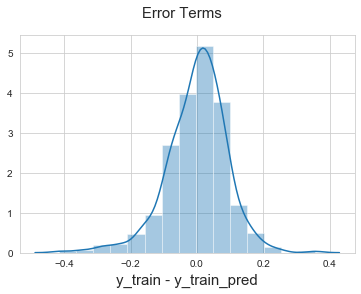

In [56]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

#### We can see Error terms are normally distributed

## Step 8: Making Predictions Using the Final Model

### Rescaling the Features

In [57]:
#Create a list of numeric variables
cols=['temp','atemp','hum','windspeed','cnt']

#Fit on data
bike_test[cols] = scaler.fit_transform(bike_test[cols])

In [58]:
bike_test.describe()

,yr,holiday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy,1
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.546074,0.530791,0.508362,0.418803,0.517923,0.254545,0.263636,0.236364,...,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182,0.640909
std,0.500809,0.187620,0.248645,0.227648,0.200875,0.187683,0.239498,0.436599,0.441609,0.425817,...,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833,0.480828
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.329310,0.333953,0.361079,0.284201,0.361045,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.545492,0.543153,0.491299,0.403318,0.520681,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.756414,0.719758,0.650989,0.523975,0.687956,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [59]:
y_test = bike_test.pop('cnt')

In [60]:
X_test = bike_test[X_train_model.drop(['const'],axis=1).columns]

In [61]:
X_test_sm = sm.add_constant(X_test)

In [62]:
y_test_pred = lm.predict(X_test_sm)

## Step 9: Model Evaluation

Text(0, 0.5, 'y_test_pred')

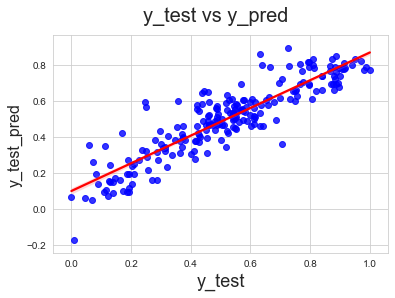

In [63]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)      

Text(0, 0.5, 'y_train_pred')

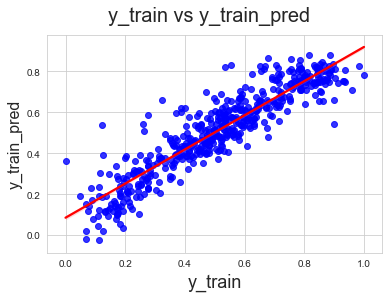

In [64]:
# Plotting y_train and y_train_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_train, y=y_train_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
fig.suptitle('y_train vs y_train_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_train_pred', fontsize = 16)      

In [65]:
r2_test=r2_score(y_test, y_test_pred)
round(r2_test,4)

0.794

In [66]:
r2_train=r2_score(y_train,y_train_pred)
round(r2_train,4)

0.8353

In [67]:
# n is number of rows in X
n = X_test.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

adjusted_test_r2 = 1-(1-r2_test)*(n-1)/(n-p-1)
round(adjusted_test_r2,4)

0.7831

In [68]:
# n is number of rows in X
n = X_train.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_train.shape[1]

adjusted_train_r2 = 1-(1-r2_train)*(n-1)/(n-p-1)
round(adjusted_train_r2,4)

0.8253

## CONCLUSION

### We can see that the equation of our best fitted line is:
     
     count= 0.1994+ 0.2336*yr -0.0975*holiday+0.491*temp -0.1479*windspeed -0.0672*spring+ 0.0465*summer+ 0.0817*winter -0.0521*Jul+ 0.0768*Sept -0.2842*Light rain_Lightsnow_Thunderstorm -0.0802*Mist_cloudy

### Analysis of R2 score values:
     
     -Train set R2 score=0.8353  and Test set R2 score=0.794
     -Deviation of R2 score=5.20%
     -Train Set Adjusted R2=0.8253 and Test set Adjusted R2=0.7831
     -Deviation of Adjusted R2=5.38%

## Inferences
1. Boombikes should encounter rise in count of rental/sale after the situation comes back to normal looking at the 2019 data. The sales increased in 2019.
2. temp column plays big role in the business of Boom bikes, Summer and winter are best time for boom bikes business the count of customers increased.
3. In Summer season, company should pay attention by giving discounts for maintaining the pace of business.
4. In Sept month, company will get more business than other months.
5. Boom bikes need to focus more on Jul month and spring season for more marketing and discounts